Name: B.S.V.W. Munasinghe

Index Number: 190397E

In [2]:
#Importing Libraries
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

# Question 1

* Example for gradient descent
* $f(x) = x^2 - 6x + 9$ 

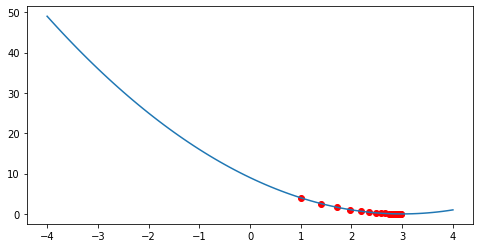

In [29]:
def f(x):
    return x**2 - 6*x + 9

def g(x):
    return 2*x - 6

alpha = 0.1
x = 1
x_hist = np.array(x)
fx_hist = np.array(f(x))
for i in range(20):
    x = x - alpha*g(x)
    x_hist = np.append(x_hist,x)
    fx_hist = np.append(fx_hist,f(x))
    
print()

fig,ax = plt.subplots(figsize=(8,4))
delta = 0.1
x_ = np.arange(-4,4+ delta,delta)
ax.plot(x_,f(x_))
ax.scatter(x_hist,fx_hist,color='r')

## Effect of the initial solution

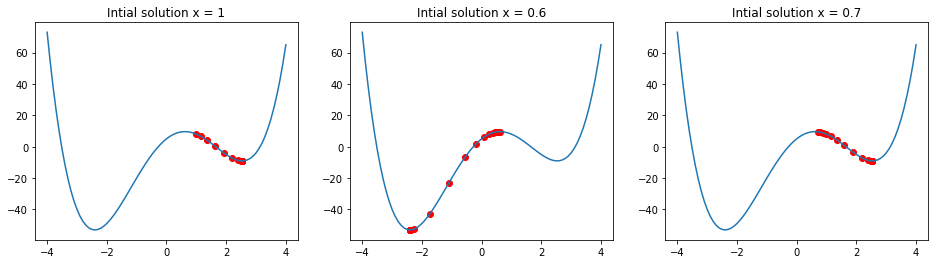

In [22]:
def f(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w) - 1
    return np.sum([x**i*w[M-i] for i in range(0,M+1)],axis=0)

def g(x):
    w = np.array([1,-1,-12,15,5])
    M = np.size(w) - 1
    return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)],axis=0)


alpha = 0.02
x_init = [1,0.6,0.7]
fig,ax = plt.subplots(1,3,figsize=(16,4))

for j in range(len(x_init)):
    x = x_init[j]
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist = np.append(x_hist,x)
        fx_hist = np.append(fx_hist,f(x))
        
    delta = 0.1
    x_ = np.arange(-4,4+ delta,delta)
    ax[j].set_title("Intial solution x = "+str(x_init[j]))
    ax[j].plot(x_,f(x_))
    ax[j].scatter(x_hist,fx_hist,color='r')

## Effect of the learning rate

C:\Users\Vidura\AppData\Local\Temp\ipykernel_2152\246273665.py:4: RuntimeWarning: overflow encountered in double_scalars
  return np.sum([x**i*w[M-i] for i in range(0,M+1)],axis=0)
c:\Python310\Computer_vision\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Vidura\AppData\Local\Temp\ipykernel_2152\246273665.py:9: RuntimeWarning: overflow encountered in double_scalars
  return np.sum([i*x**(i-1)*w[M-i] for i in range(0,M+1)],axis=0)


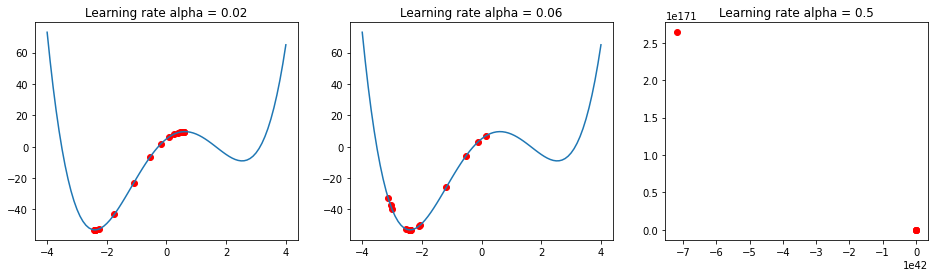

In [24]:
alpha_set = [0.02,0.06,0.5]
x = 0.6
fig,ax = plt.subplots(1,3,figsize=(16,4))

for j in range(len(alpha_set)):
    alpha = alpha_set[j]
    x_hist = np.array(x)
    fx_hist = np.array(f(x))
    for i in range(20):
        x = x - alpha*g(x)
        x_hist = np.append(x_hist,x)
        fx_hist = np.append(fx_hist,f(x))
        
    delta = 0.1
    x_ = np.arange(-4,4+ delta,delta)
    ax[j].set_title("Learning rate alpha = "+str(alpha_set[j]))
    ax[j].plot(x_,f(x_))
    ax[j].scatter(x_hist,fx_hist,color='r')

In [26]:
#finding root close to x0
from scipy.optimize import fsolve
from scipy.optimize import minimize

x0 = 0.6
root = fsolve(g,x0)
print(root)
minimum = minimize(f,x0)
print(minimum) 

[0.61654501]
      fun: -53.1184048380149
 hess_inv: array([[0.01680084]])
      jac: array([-2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 10
   status: 0
  success: True
        x: array([-2.40040317])


# Question 2

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 , mnist

( x_train , y_train ) , ( x_test , y_test ) = cifar10.load_data()
# (x_train , y_train ) , ( x_test , y_test ) = mnist.load_data()
print( "x_train => " , x_train.shape )

Ntr = x_train.shape[ 0 ]
Nte = x_test.shape[ 0 ]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr),:]
x_test=x_test[range(Nte) , : ]
y_train= y_train [ range ( Ntr ) ]
y_test= y_test [ range ( Nte ) ]

x_train =>  (50000, 32, 32, 3)


In [28]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [29]:
K = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train,num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train/= 255.
x_test/= 255.
std = 1e-5
w=std*np.random.randn(Din,K)
b=np.zeros(K)
lr=1e-3
lr_decay = 0.1
epochs = 11
batch_size = 1000
loss_history = []
rng = np.random.default_rng(seed=0)

for e in range(epochs):
    indices=np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]
        
        #forward pass
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred-y).sum()
        loss_history.append(loss)
        
        #backward pass
        dy_pred = 1./batch_size*2*(y_pred-y)
        dw= x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w-lr*dw
        b = b-lr*db
    if e%5==0:
        print('Iteration %d/%d: loss %f'%(e,epochs,loss))
    if e%10 ==0:
        lr*=lr_decay
        

Iteration 0/11: loss 0.850460
Iteration 5/11: loss 0.836764
Iteration 10/11: loss 0.834911


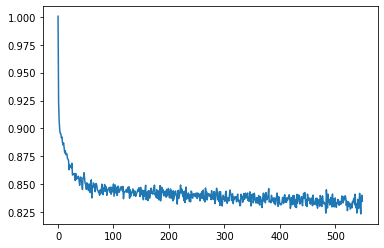

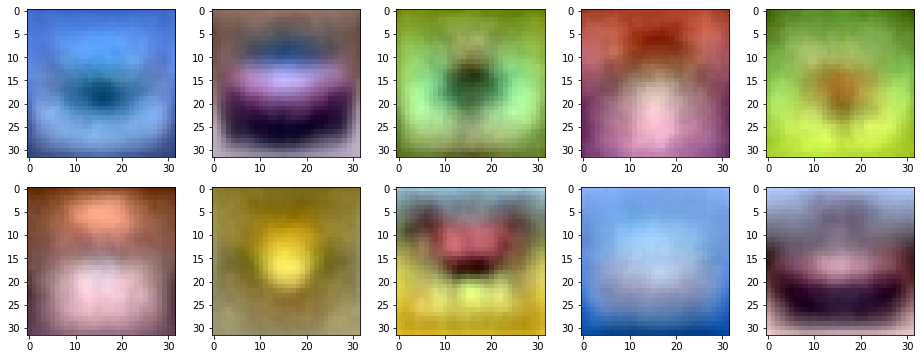

train_acc =  0.33562
test_acc =  0.335


In [31]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train,y_test,y_train_pred,y_test_pred,loss_history,w,showim=True)